In [6]:
import torch
import torchvision
from torchvision import transforms as T

from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

In [7]:
model =torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained= True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
model.eval()

In [9]:
!wget='http://images.cocodataset.org/val2017/000000037777.jpg'

In [24]:
ig = Image.open('/content/WhatsApp Image 2023-11-04 at 15.31.52.jpeg')
ig = ig.convert('RGB')

In [25]:
transform= T.ToTensor()
img= transform(ig)


In [26]:
with torch.no_grad():
  pred= model([img])

In [27]:
pred

[{'boxes': tensor([[ 201.8617,  375.4811,  738.0000, 1004.6833],
          [   0.0000,  368.6887,  359.6037,  934.9122],
          [  13.1346,  171.2356,  435.7294,  545.2161],
          [ 525.0732,  304.1478,  606.6456,  377.2187],
          [ 619.5720,  734.3582,  738.0000,  822.1550],
          [ 541.1790,  195.7156,  737.4813,  808.6224],
          [ 551.8377,  179.7308,  736.9361,  485.8437],
          [ 332.7741,  181.2272,  738.0000,  866.0101],
          [  10.9980,  321.2369,  397.8256,  639.0255],
          [   5.5281,  365.6665,   86.8619,  879.1488],
          [ 526.7589,  303.1290,  608.0873,  374.8491],
          [   0.0000, 1076.0566,  738.0000, 1588.9760]]),
  'labels': tensor([ 1,  1,  1, 62,  1,  1,  1,  1,  1,  1, 63, 73]),
  'scores': tensor([0.9954, 0.9886, 0.9785, 0.5971, 0.4858, 0.3632, 0.2003, 0.1049, 0.0824,
          0.0640, 0.0549, 0.0547])}]

In [28]:
pred[0].keys()

dict_keys(['boxes', 'labels', 'scores'])

In [29]:
boxes, labels, scores= pred[0]["boxes"], pred[0]['labels'], pred[0]['scores']

In [30]:
scores

tensor([0.9954, 0.9886, 0.9785, 0.5971, 0.4858, 0.3632, 0.2003, 0.1049, 0.0824,
        0.0640, 0.0549, 0.0547])

In [33]:
num= torch.argwhere(scores>0.9).shape[0]

In [36]:
coco_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" ,
"frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" ,
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" ,
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" ,
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]

In [34]:
font= cv2.FONT_HERSHEY_SIMPLEX

In [37]:
ig1=cv2.imread('/content/WhatsApp Image 2023-11-04 at 15.31.52.jpeg')
for i in range(num):
  x1, y1, x2, y2 = boxes[i].numpy().astype("int")
  class_name=coco_names[labels.numpy()[i]-1]
  ig1=cv2.rectangle(ig1, (x1,y1),(x2,y2),(0,255,0),1)
  ig1=cv2.putText(ig1, class_name, (x1,y1-10), font, 0.5, (255,0,0), 1, cv2.LINE_AA )

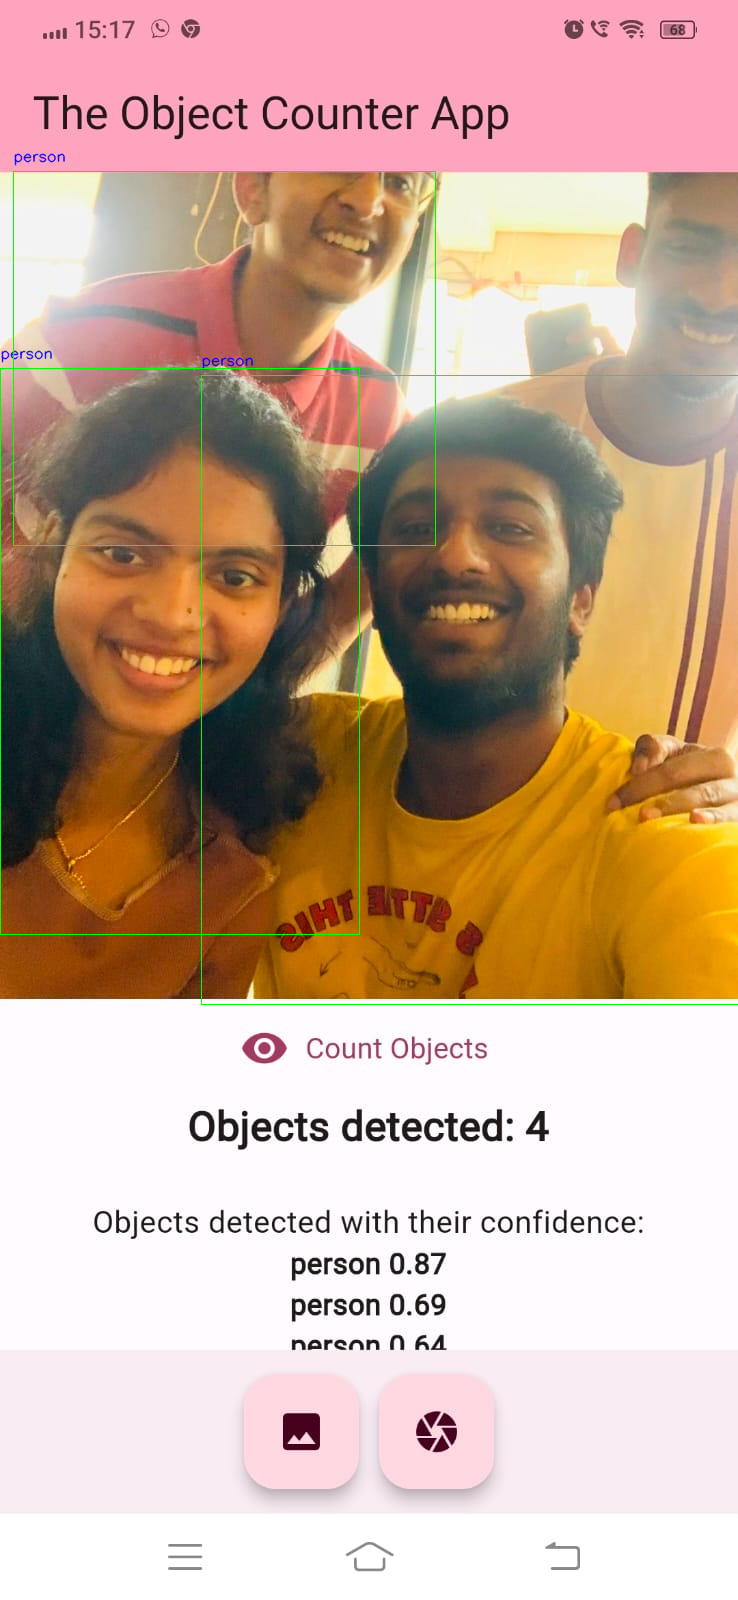

In [38]:
cv2_imshow(ig1)